Music21可以导入和导出许多不同的音乐数据格式。

其中许多格式的片段都随Music21作为语料库模块的一部分分发（请参见music21.corpus）；查看在 music21语料库中找到的作品清单，以查看全部作品。

通常，要从磁盘加载文件，请调用 music21.converter.parse()，它可以处理所有支持的格式的导入。（有关文件和数据格式的完整文档，请参阅music21.converter。）如果要从语料库转换文件，请使用music21.corpus.parse()：

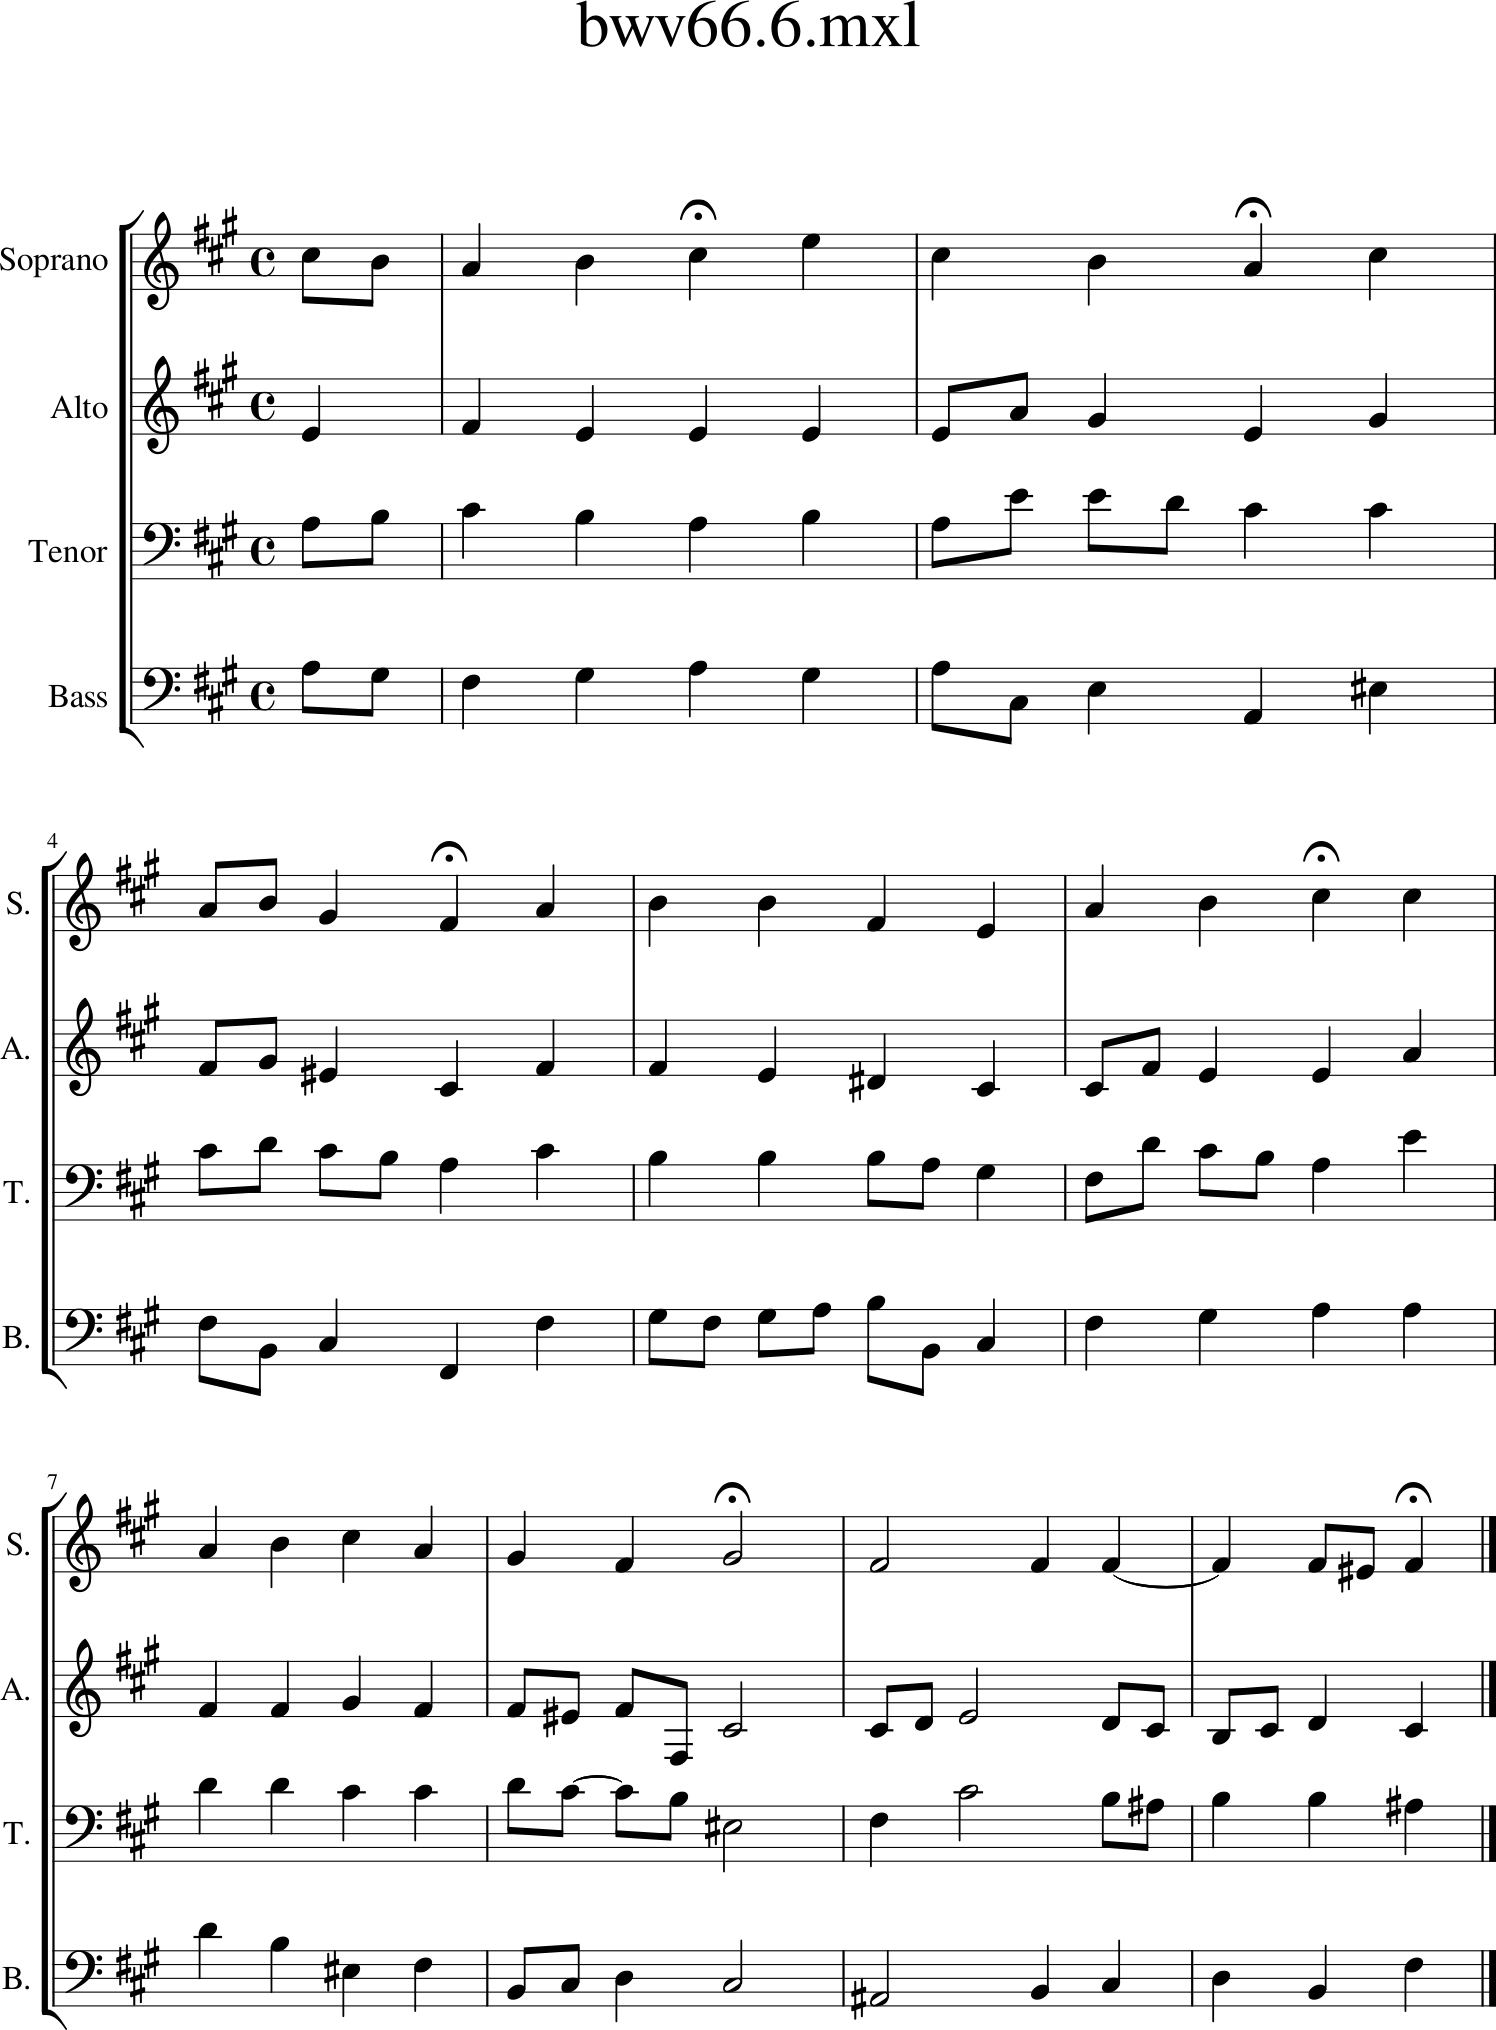

In [1]:
from music21 import *
b = corpus.parse('bach/bwv66.6')
b.show() # I've altered this so it's much shorter than it should be...

好的，所以说您在看东西时遇到了一些问题。首先要问的是：

您是否有Finale，Sibelius或MuseScore？甚至免费版本的Finale记事本也可以使用。

您是否可以访问http://www.finalemusic.com/products/finale-notepad/ 或https://musescore.org并获得免费副本？

一旦您安装了这三个之一，我们就可以继续。（这是 可以使用music21单独与LilyPond的，但是这是更难获得正确配置，所以请尽量将第一）

运行以下命令（在之后）：from music21 import *

In [ ]:
configure.run()

您可以对“是/否”的所有内容说“否”，但是请确保找到您的MuseScore，Finale或Sibelius副本。
### 解析文件
您可以通过调用解析硬盘上的文件 music21.converter.parse()。Score尽管有时Part（对于仅处理单个部分的格式）或Opus（对于绑定在一起的多个乐谱）有时返回 ，但通常会 返回。除非您将其分配给变量，否则您将不会做太多事情c：

c = converter.parse('/Users/cuthbert/Desktop/myXML.xml')

如果在PC上，要注意的一件事是可以使用正斜杠，如下所示：

In [ ]:
c = converter.parse('C:/Users/cuthbert/Desktop/myXML.xml')

或者，您可以使用反斜杠，只要您在文件名前的引号前加上r：

c = converter.parse(r'C:\Users\cuthbert\Desktop\myXML.xml')

如果您要的文件在网络上，我们可以为music21.converter.parse()指向所需文件的功能提供一个URL 。假设系统配置正确（我们将在第24章中进一步介绍），将下载并解析文件。

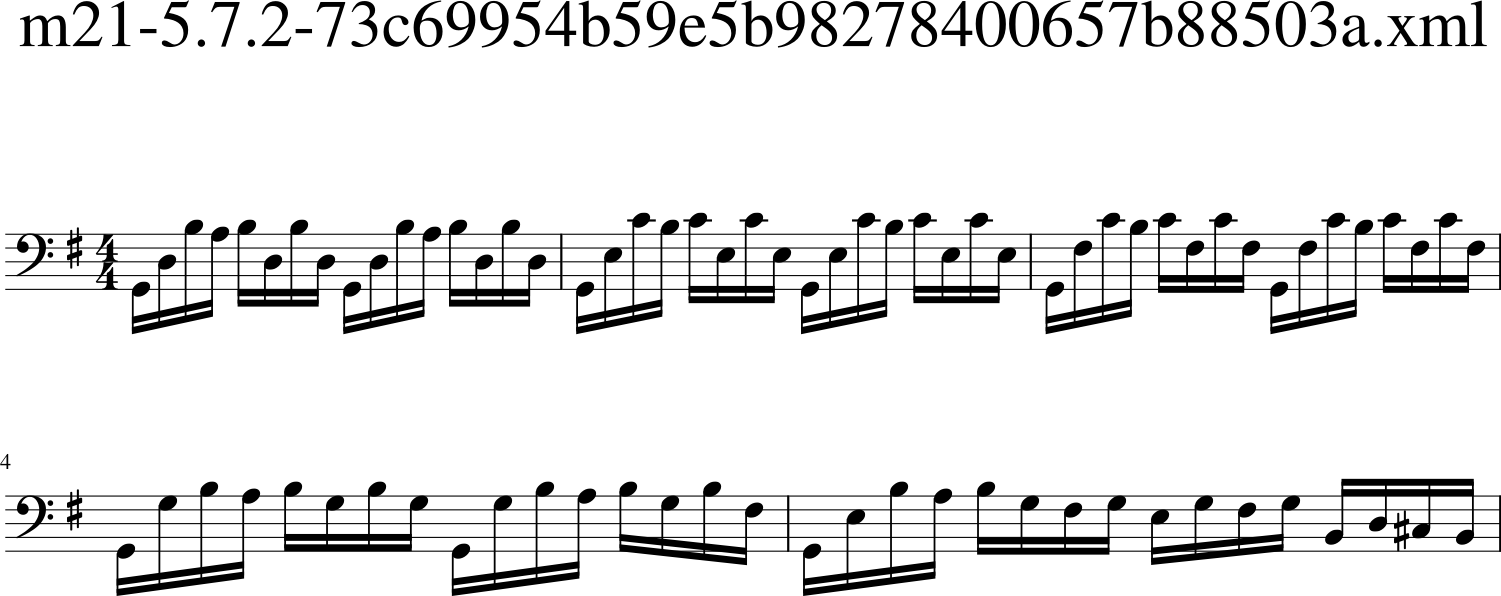

In [4]:
url = 'http://kern.ccarh.org/cgi-bin/ksdata?l=cc/bach/cello&file=bwv1007-01.krn&f=xml'
sAlt = converter.parse(url)
sAlt.measures(1, 5).show() # show first 5 measures

通常，可以从文件名猜测文件格式，但是如果文件名没有后缀（该死，OS X！）或URL后缀有误，则可以为format="FORMAT"文件指定参数：

In [ ]:
c = converter.parse('/Users/cuthbert/Desktop/myXML', format='musicxml')

随着时间的推移，您会注意到的一件事是，一旦将文件解析为music21一次，则下次解析文件的速度将提高2到5倍。这是因为我们在您第一次创建文件时保存了文件的优化版本，随后您打开该文件时，它将检查原始文件是否已更改，如果没有更改，它将改为读取该优化版本。 。

对于大多数人来说，这将100％地起作用。但是，如果您做了一些偷偷摸摸的事情（例如在不更改文件修改时间的情况下更改了文件），或者更改了music21 解析器的格式，或者如果事情不正确，或者您只是想做得慢一点，则可以放一个forceSource=True关键字转换成parse 格式。

In [ ]:
c = converter.parse('/Users/cuthbert/Desktop/myXML.xml', forceSource=True)

### 可用文件类型music21
Music21可以读写许多不同的文件格式。其中一些非常模糊。其中一些是世界标准。该 converter模块的资本C- Converter对象可以给一些人的名单。每种使用一种格式的工具都称为 subConverter。以下是music21可以读取的格式：

In [5]:
converter.Converter().subconvertersList('input')

[music21.converter.subConverters.ConverterABC,
 music21.converter.subConverters.ConverterCapella,
 music21.converter.subConverters.ConverterClercqTemperley,
 music21.converter.subConverters.ConverterHumdrum,
 music21.converter.subConverters.ConverterMEI,
 music21.converter.subConverters.ConverterMidi,
 music21.converter.subConverters.ConverterMuseData,
 music21.converter.subConverters.ConverterMusicXML,
 music21.converter.subConverters.ConverterNoteworthy,
 music21.converter.subConverters.ConverterNoteworthyBinary,
 music21.converter.subConverters.ConverterRomanText,
 music21.converter.subConverters.ConverterScala,
 music21.converter.subConverters.ConverterTinyNotation,
 music21.converter.subConverters.ConverterVolpiano]

以及它可以编写的格式：

In [6]:
converter.Converter().subconvertersList('output')

[music21.converter.subConverters.ConverterBraille,
 music21.converter.subConverters.ConverterLilypond,
 music21.converter.subConverters.ConverterMidi,
 music21.converter.subConverters.ConverterMusicXML,
 music21.converter.subConverters.ConverterScala,
 music21.converter.subConverters.ConverterText,
 music21.converter.subConverters.ConverterTextLine,
 music21.converter.subConverters.ConverterVexflow,
 music21.converter.subConverters.ConverterVolpiano]

到输出文件，无论是呼叫.show("format")流上（其中格式可以是musicxml，braille，midi等）或保持磁盘上的文件，使用。.write("format", "filename")

下面列出了一些可用格式；目前最重要的是输出格式（因为music21会自动找出输入）。它们是braille，lilypond，midi， musicxml，scala，text，和vexflow。

某些格式具有子格式，例如两者都有musicxml， lilypond并且其.png子格式可以直接转换为 .png文件。要使用它，请致电.show("musicxml.png")。

某些格式也有缩写，musicxmlis也是xml， lilypondis lily和is （为了便于键入）textis t。
### 获取和使用MusicXML文件
可以在以下URL中找到一堆MusicXML文件。

- http://www.musescore.com/
- http://www.gutenberg.org/

MusicXML文件有时具有扩展名.xml，有时 具有扩展名.mxl。通常后者是压缩的音乐XML文件。他们加载相同。

musicxml的格式当然是musicxml。
### 获取和使用Humdrum文件
Humdrum是由俄亥俄州立大学的David Huron开发的一种文件格式，擅长对计算分析进行编码。Humdrum格式包括许多子格式（“脊柱类”），它们 music21支持常规类，kern格式和 dynam动态格式。

解析Humdrum文件与解析其他数据格式完全相同。只需在所需的文件路径或URL上调用music21.converter.parse（）函数即可。

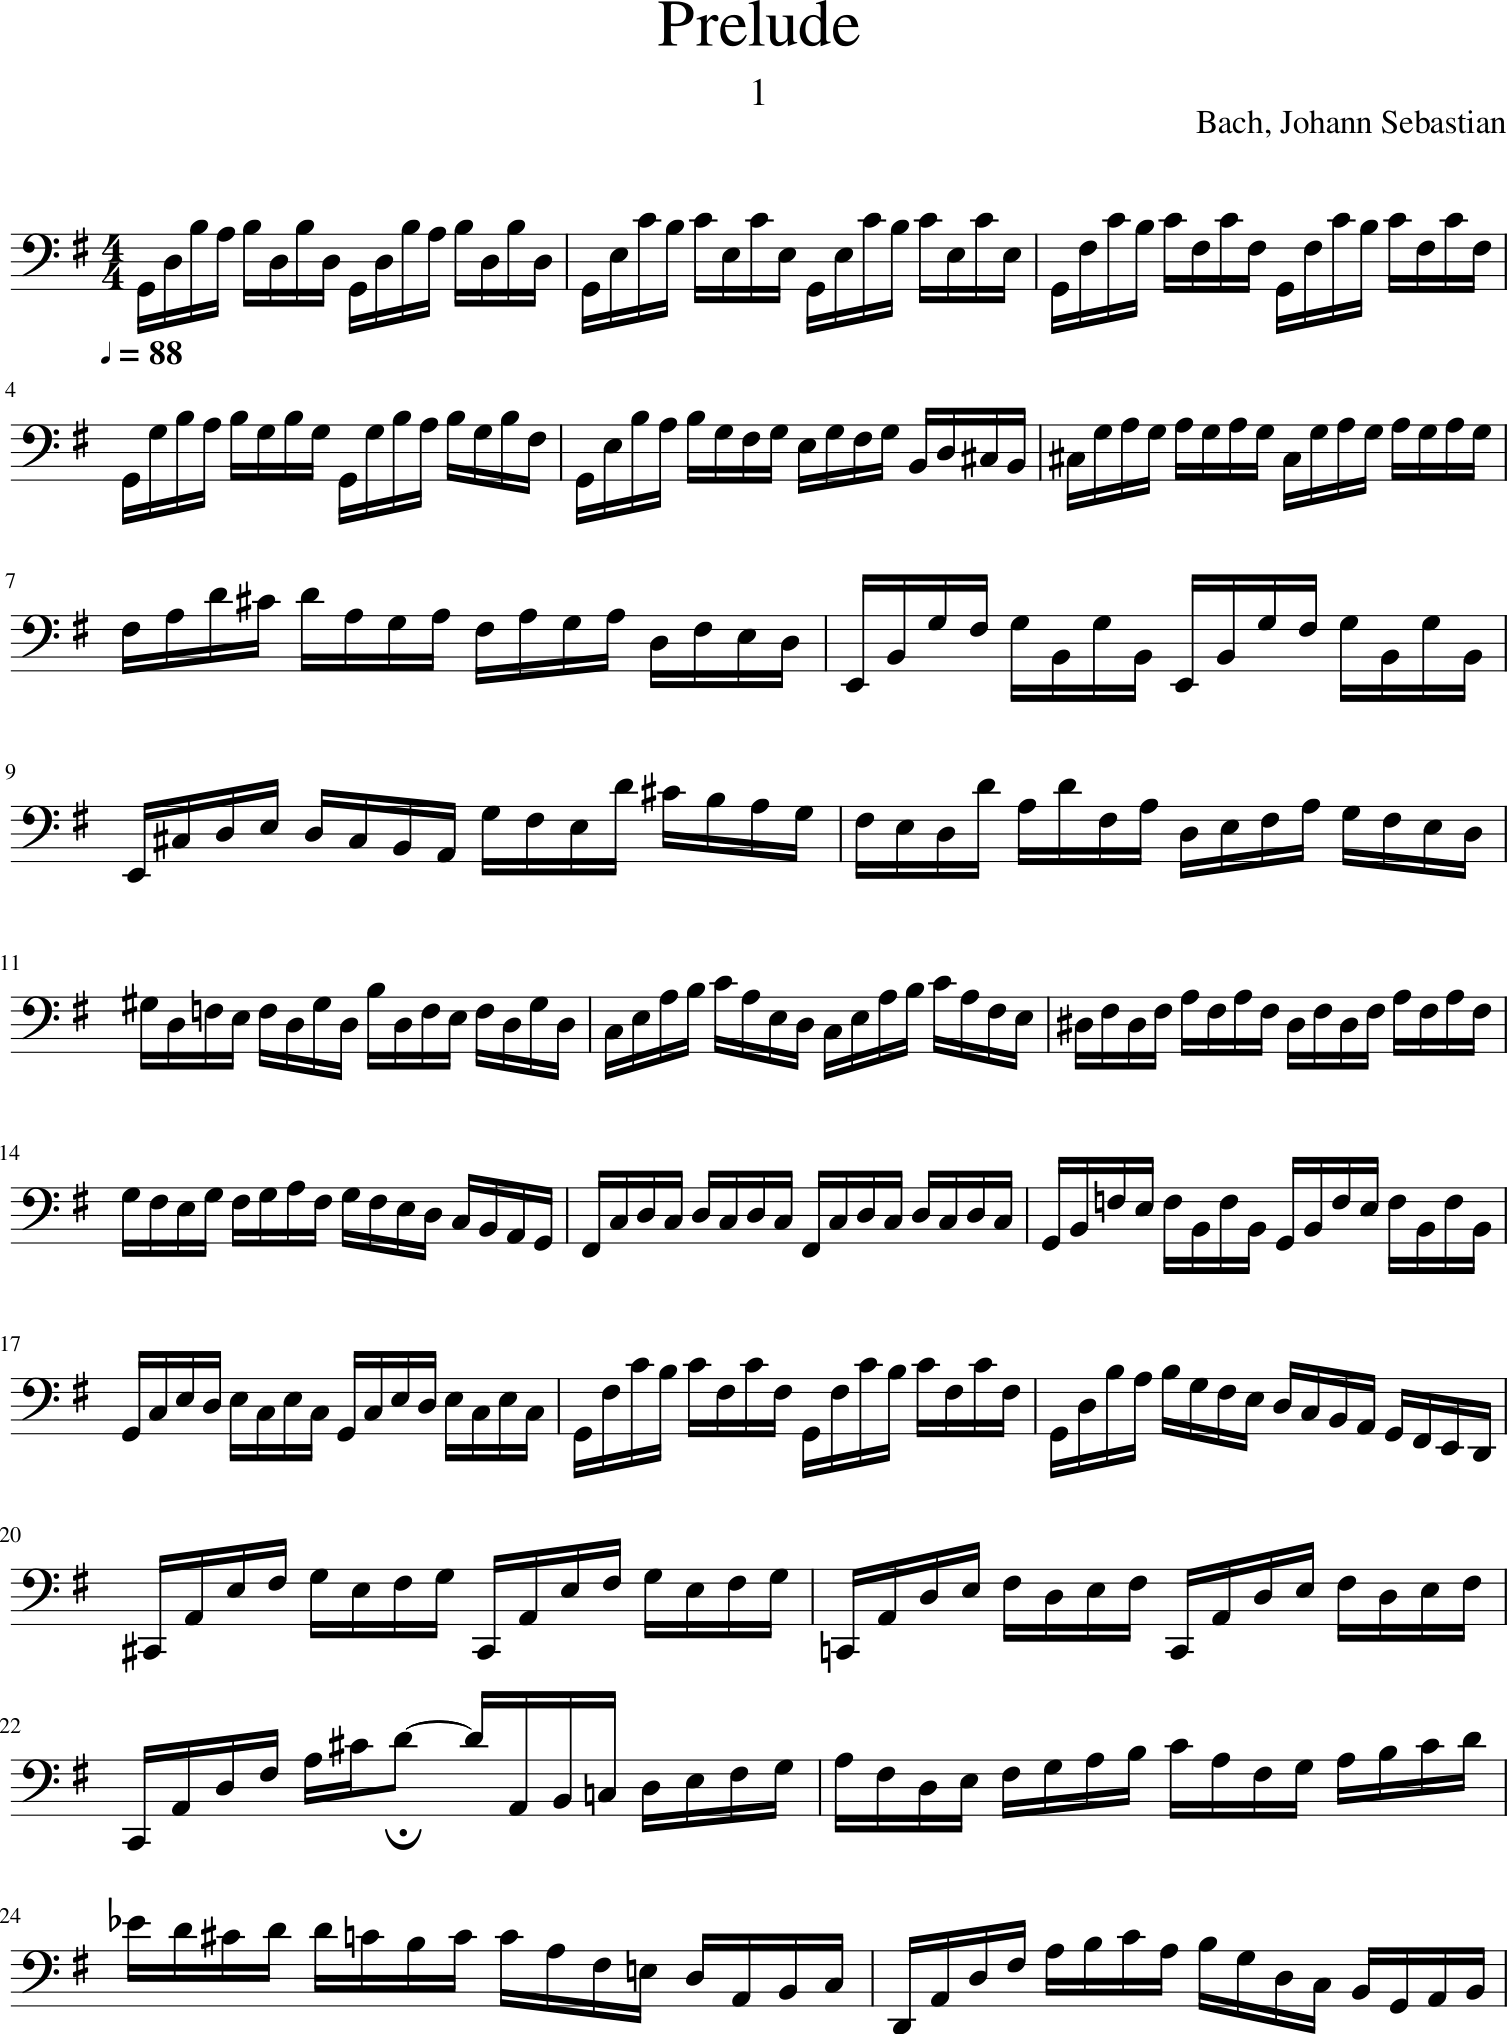

In [8]:
sBach = converter.parse('http://kern.ccarh.org/cgi-bin/ksdata?' +
                        'l=users/craig/classical/bach/cello&file=bwv1007-01.krn&f=kern')
sBach.show()

在以下URL上可以找到十万多个Kern文件。

http://kern.humdrum.org/
### 获取和使用ABC文件
ABC是一种基于文本的格式，可以编码多种音乐类型，但特别适用于诸如民谣之类的单声道歌曲。如果您在民间歌曲界，那么您会喜欢与ABC合作的。

解析ABC文件与解析其他数据格式完全相同。只需music21.converter.parse()在所需的文件路径或URL上调用该函数即可。

In [ ]:
o = converter.parse('/Users/cuthbert/Documents/Music21/praludium.abc')

许多在线存储库都提供大量的ABC收藏。以下链接只是众多可用资源中的一部分。
- http://abcnotation.com
- http://www.serpentpublications.org
### ABC Opus文件
请注意，许多ABC文件定义了多个完整的音乐作品。如果一个ABC文件定义了多个作品，Opus则返回一个 对象。Opus对象是Stream的子类，它提供了用于访问多个Score对象的便捷方法。

您只需解析文件即可获得一大堆碎片。例如，这是一个作品：

In [10]:
o = corpus.parse('josquin/ovenusbant')
o

<music21.stream.Opus 0x205563d4080>

参考工作编号（例如，ABC中的“ X：”元数据标签）存储Metadata在每个包含的分数中的对象中。该music21.stream.Opus.getNumbers()方法可从Opus访问这些编号 。另外， Score可以通过该getScoreByNumber()方法直接获得对象。

In [11]:
o = corpus.parse('josquin/ovenusbant')
o.getNumbers()

['1', '2', '3']

In [12]:
s = o.getScoreByNumber(2)
s.metadata.title

'O Venus bant'

该getScoreByTitle() 方法可以按标题直接访问Opus中包含的Score对象。

In [13]:
o = corpus.parse('essenFolksong/erk5')
s = o.getScoreByTitle('Vrienden, kommt alle gaere')
s

<music21.stream.Score 0x20558fe7208>

In [14]:
s.metadata.title

'Vrienden, kommt alle gaere'

某些ABC文件（例如其中的文件）corpus/essenFolksong具有数百或数千个文件。我们之前做事的方式是解析所有内容，然后选择所需的内容。但是，如果知道所需文件的编号，则可以传递给 converter.parse或corpus.parse一个number=X属性来获取该文件。它将返回一个Score对象

In [15]:
s = corpus.parse('essenFolksong/erk5', number=2)
s

<music21.stream.Score 0x20556463160>

### ABC单部分Opus文件
在某些情况下，ABC文件可能会将各个部分定义为单独的分数，就像文艺复兴时期的部分手册一样。解析后，可以使用该music21.stream.Opus.mergeScores()方法将这些部分从Opus组合成单个Score 。

例如，以下是Josquin的“ Mille Regretz”（用s拼写）存储为四个单独的部分，每个部分作为其自己的分数存储：

In [17]:
o = corpus.parse('josquin/milleRegrets')
len(o.scores)

4

In [18]:
len(o.scores[0].parts)

1

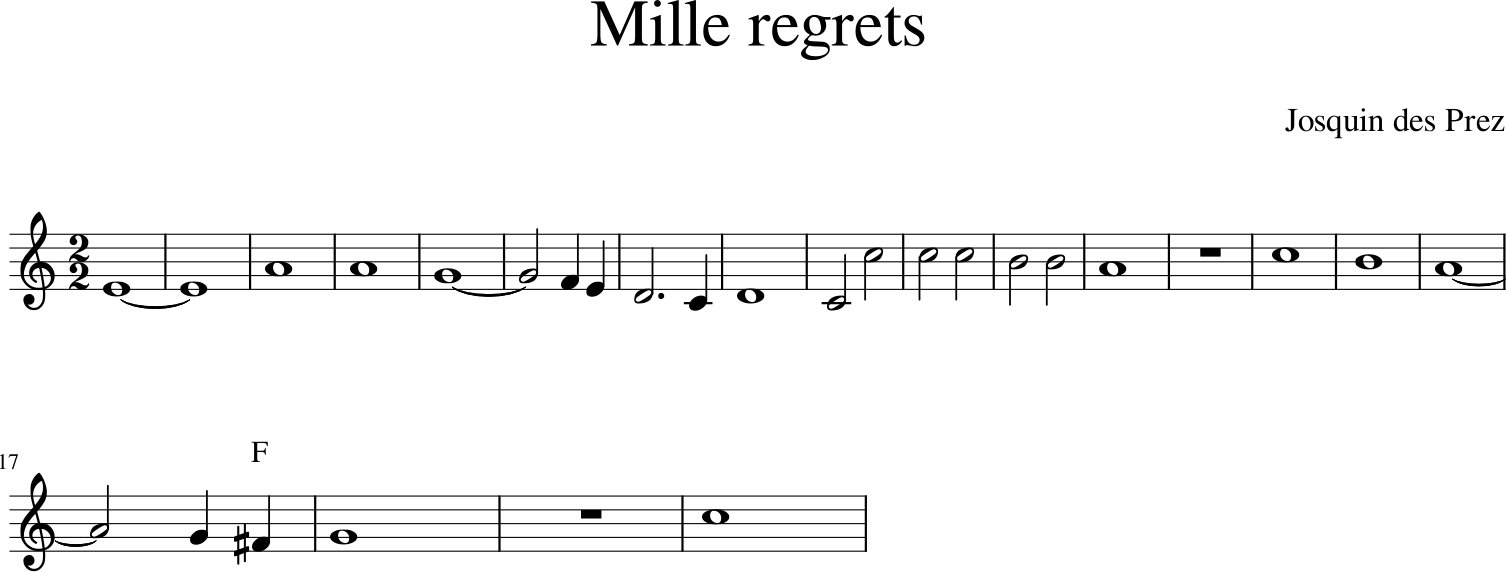

In [19]:
o.scores[0].measures(1, 20).show()

因此，这并没有太大帮助。我们可以mergeScores将它们分为四个部分，得出一个单一的分数。

In [20]:
s = o.mergeScores()
s.metadata.title

'Mille regrets'

In [21]:
len(s.parts)

4

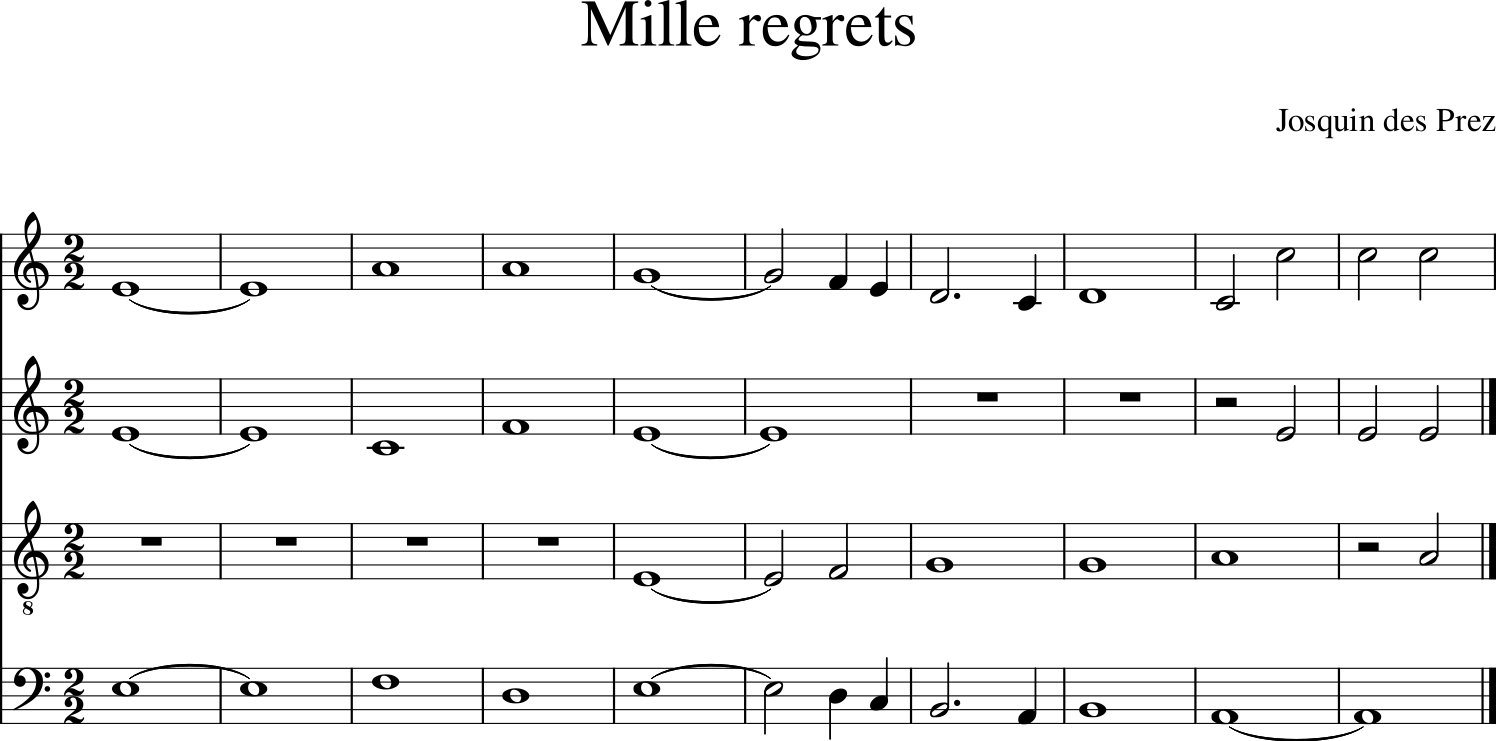

In [22]:
s.measures(1, 10).show()

### 解析Musedata文件
Musedata是Walter Hewlett（是的，HP谱系）在1980年代设计的一种格式，具有很高的存储效率。可能不是现代计算机的最佳格式，但是在许多标准存储库的网上都有大量的Musedata文件。

Music21支持第1阶段（受限编码）和第2阶段（丰富编码）Musedata文件格式。可以使用music21.converter.parse()所需文件路径或URL上的功能导入多部分Musedata（阶段2）文件，压缩档案和包含每个部分（阶段1或阶段2）的单个文件的目录 。

请注意，访问限制阻止演示Musedata转换。下载或使用Musedata文件需要向所有者发送书面访问协议。

### 解析MIDI文件
MIDI输入和输出的处理方式与其他格式相同。只需music21.converter.parse()在所需的文件路径或URL上调用该函数即可。

请记住（或了解是否还没有），MIDI没有关于谐音拼写的信息（C＃和Db相同），并且检测音符的长度可能很困难。Music21对于在符号软件或音序软件中创建的MIDI文件效果很好，但是在处理通过录制实时输入创建的MIDI文件时却比较费时。对于这些文件，我们建议在诸如Finale之类的软件中转换MIDI文件，该软件具有更复杂的MIDI到MusicXML转换例程。

### 结论
其中的music21核心优势是它可以处理不同的文件格式的数量。一些不music21用于其他用途的人将其用作格式转换器。我们对此感到高兴，但是想想，您可以使用它做更多的事情。在下一章中，让我们继续music21进行分析的工具之一，其中几乎没有其他工具可以使用： 第9章：Chordify，可将乐谱减少到和弦集合。